In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
# 1. Data Preparation
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

In [2]:
df = pd.read_csv("DailyDelhiClimateTrain.csv",index_col="date",parse_dates=True)

In [3]:
df.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [32]:
print("Summary Statistics:")
print(df['meantemp'].describe())

Summary Statistics:
count    1462.000000
mean       25.495521
std         7.348103
min         6.000000
25%        18.857143
50%        27.714286
75%        31.305804
max        38.714286
Name: meantemp, dtype: float64


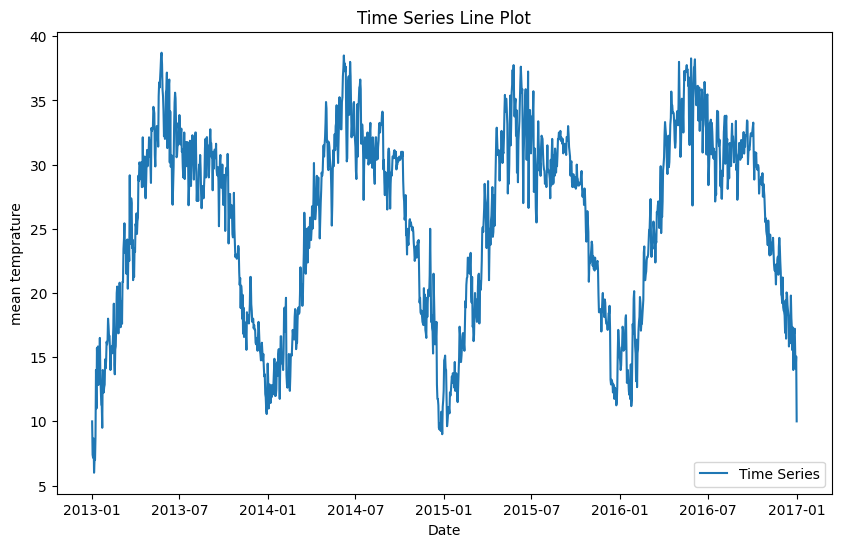

In [34]:
# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(df['meantemp'], label='Time Series')
plt.title('Time Series Line Plot')
plt.xlabel('Date')
plt.ylabel('mean temprature')
plt.legend()
plt.show()

>Box Plot by Month
Seasonal Variability: If box heights differ substantially across months, it indicates seasonal effects.

<Figure size 1000x600 with 0 Axes>

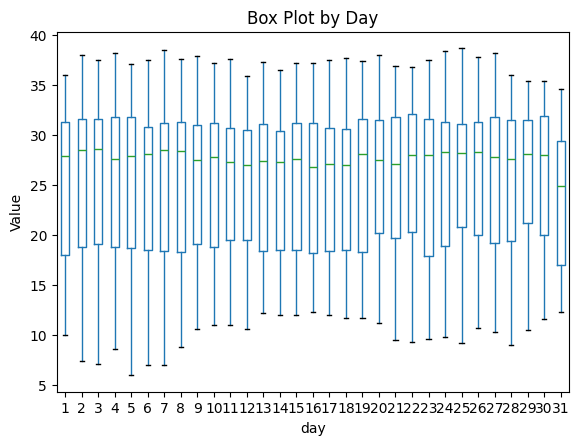

In [35]:
# Box Plot (e.g., by Month if data is monthly)
df['day'] = df.index.day
plt.figure(figsize=(10, 6))
df.boxplot(column='meantemp', by='day', grid=False)
plt.title('Box Plot by Day')
plt.suptitle('')
plt.xlabel('day')
plt.ylabel('Value')
plt.show()

> Visual Interpretation,
>
> Look at the plotted components:
- Trend: Smoother than the original series.
- Seasonal: Cyclical and repetitive.
- Residual: Should ideally look like white noise (random with no discernible pattern).

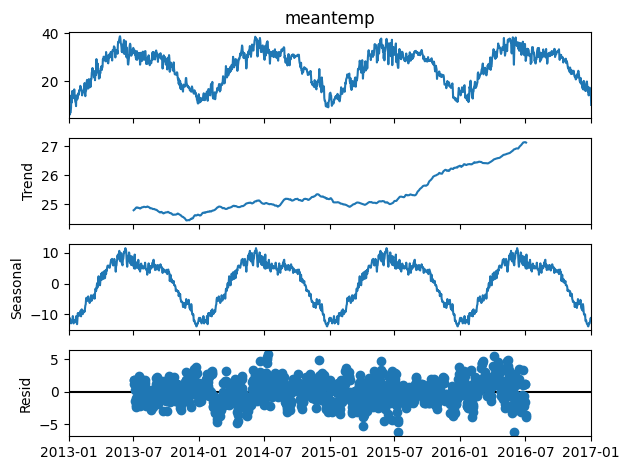

In [37]:
# Perform seasonal decomposition (additive or multiplicative)
result = seasonal_decompose(df['meantemp'], model='additive', period=365)  # Adjust period based on your data

# Plot decomposition
result.plot()
plt.tight_layout()
plt.show()

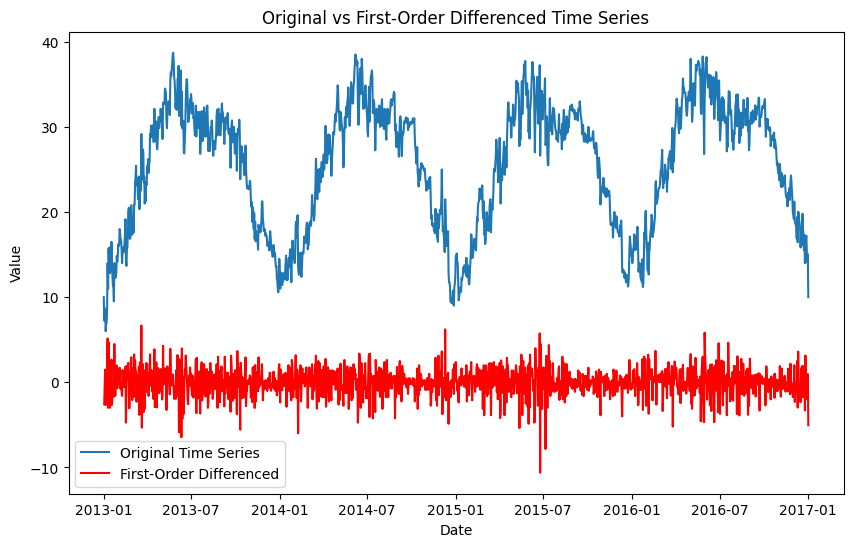

In [41]:
# Apply First-Order Differencing
df['diff_value'] = df['meantemp'].diff()

# Plot Original vs Differenced
plt.figure(figsize=(10, 6))
plt.plot(df['meantemp'], label='Original Time Series')
plt.plot(df['diff_value'], label='First-Order Differenced', color='red')
plt.title('Original vs First-Order Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [38]:
# Access individual components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

In [39]:
trend,seasonal,residual

(date
 2013-01-01   NaN
 2013-01-02   NaN
 2013-01-03   NaN
 2013-01-04   NaN
 2013-01-05   NaN
               ..
 2016-12-28   NaN
 2016-12-29   NaN
 2016-12-30   NaN
 2016-12-31   NaN
 2017-01-01   NaN
 Name: trend, Length: 1462, dtype: float64,
 date
 2013-01-01   -11.112191
 2013-01-02   -12.097390
 2013-01-03   -11.386488
 2013-01-04   -11.134559
 2013-01-05   -11.317170
                 ...    
 2016-12-28   -12.698616
 2016-12-29   -12.224746
 2016-12-30   -11.434549
 2016-12-31   -11.112191
 2017-01-01   -12.097390
 Name: seasonal, Length: 1462, dtype: float64,
 date
 2013-01-01   NaN
 2013-01-02   NaN
 2013-01-03   NaN
 2013-01-04   NaN
 2013-01-05   NaN
               ..
 2016-12-28   NaN
 2016-12-29   NaN
 2016-12-30   NaN
 2016-12-31   NaN
 2017-01-01   NaN
 Name: resid, Length: 1462, dtype: float64)

In [43]:
def adf_test(series):
    print("Results of ADF Test:")
    adf_result = adfuller(series, autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for label, value in zip(labels, adf_result[:4]):
        print(f"{label}: {value}")
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"   {key}: {value}")
    if adf_result[1] <= 0.05:
        print("The series is stationary (p-value <= 0.05).")
    else:
        print("The series is non-stationary (p-value > 0.05).")

# Run the test
adf_test(df['diff_value'].dropna())

Results of ADF Test:
ADF Statistic: -16.378720267074723
p-value: 2.764863137594368e-29
#Lags Used: 9
Number of Observations Used: 1451
Critical Values:
   1%: -3.4348647527922824
   5%: -2.863533960720434
   10%: -2.567831568508802
The series is stationary (p-value <= 0.05).


In [4]:
time_series_data = df.values

In [5]:
scaler = MinMaxScaler()
time_series_data = scaler.fit_transform(time_series_data)

In [6]:
time_series_data.shape

(1462, 4)

In [8]:
time_series_data[0]

array([0.12227074, 0.8209571 , 0.        , 0.13260331])

In [9]:
# Create sequences for multivariate time series
def create_multivariate_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length, 0])  # Predict Feature 1 for the next step
    return np.array(x), np.array(y)

In [10]:
# Generate synthetic time series data
# np.random.seed(42)
# time_series_data = np.sin(np.arange(0, 100, 0.1)) + np.random.normal(scale=0.1, size=1000)
seq_length = 50

In [11]:
len(time_series_data)

1462

In [12]:
# Prepare sequences
x, y = create_multivariate_sequences(time_series_data, seq_length)
# x = x[..., np.newaxis]  # Add feature dimension

In [13]:
x.shape

(1412, 50, 4)

In [15]:
x[0]

array([[0.12227074, 0.8209571 , 0.        , 0.13260331],
       [0.04279476, 0.90759076, 0.07058266, 0.132881  ],
       [0.0356623 , 0.84983498, 0.10974262, 0.13299381],
       [0.08151383, 0.66886689, 0.02921206, 0.13279856],
       [0.        , 0.84790979, 0.08763619, 0.13271178],
       [0.03056769, 0.80132013, 0.03505448, 0.13290703],
       [0.03056769, 0.75280528, 0.14921838, 0.13316737],
       [0.08733624, 0.58085809, 0.16918184, 0.13300001],
       [0.24454148, 0.43688119, 0.29606821, 0.13277686],
       [0.15283843, 0.56105611, 0.17527238, 0.13260331],
       [0.29694323, 0.43729373, 0.25038912, 0.13266529],
       [0.24454148, 0.69966997, 0.31332476, 0.13259091],
       [0.30058224, 0.71314631, 0.10974262, 0.13229958],
       [0.20887918, 0.86331133, 0.01460603, 0.13253822],
       [0.26637555, 0.67491749, 0.01251946, 0.1326281 ],
       [0.23944687, 0.8459846 , 0.        , 0.13273348],
       [0.3209607 , 0.77860286, 0.12434865, 0.132625  ],
       [0.23944687, 0.90951595,

In [14]:
y.shape

(1412,)

# Advantages of LSTM Over Transformers for Time Series
> - Better for small datasets due to fewer parameters.
> - Captures temporal patterns naturally without the need for positional encoding.
> - Handles noise better in time series data.
- This LSTM implementation should perform well for most time series forecasting tasks!

In [85]:
from tensorflow.keras import layers, models

# Build the LSTM model
def build_lstm(seq_length, feature_dim):
    model = models.Sequential([
        layers.Input(shape=(seq_length, feature_dim)),
        layers.LSTM(20, return_sequences=False,dropout=0.2),
        # layers.LSTM(64, return_sequences=True,dropout=0.2),
        # layers.LSTM(32, return_sequences=False),
        layers.Dense(10, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="adam", loss="huber", metrics=["mae"])
    return model

# Build and compile the model
feature_dim = x.shape[-1]  # Number of features in the input
model = build_lstm(seq_length, feature_dim)

# Train the model
history = model.fit(x, y, epochs=200, batch_size=32, validation_split=0.2)


Epoch 1/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1499 - mae: 0.4981 - val_loss: 0.0505 - val_mae: 0.2869
Epoch 2/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0235 - mae: 0.1811 - val_loss: 0.0135 - val_mae: 0.1462
Epoch 3/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0140 - mae: 0.1339 - val_loss: 0.0093 - val_mae: 0.1181
Epoch 4/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0114 - mae: 0.1131 - val_loss: 0.0100 - val_mae: 0.1236
Epoch 5/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0106 - mae: 0.1098 - val_loss: 0.0100 - val_mae: 0.1241
Epoch 6/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0075 - mae: 0.0949 - val_loss: 0.0066 - val_mae: 0.0972
Epoch 7/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0065 - mae: 0.0861 - val_loss: 0.0115 - val_mae: 0.1361
Epoch 8/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0073 - mae: 0.0852 - val_loss: 0.0088 - val_mae: 0.1161
Epoch 9/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - lo

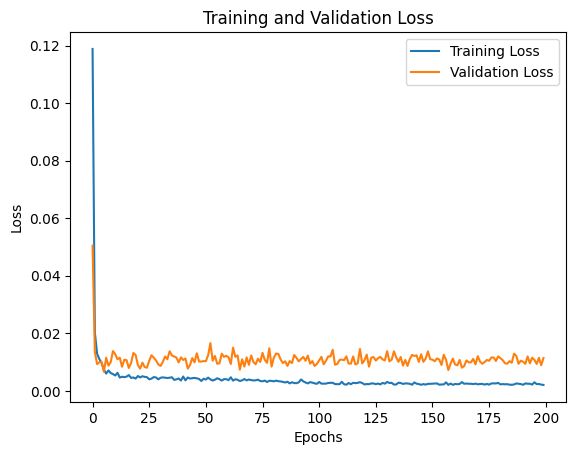

In [86]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [87]:
# Make predictions
predictions = model.predict(x[:100])
print("Predictions:", predictions.flatten())
print("Actual:", y[:100])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predictions: [0.25745773 0.2883578  0.33096272 0.34609836 0.30104807 0.28673744
 0.28678328 0.29441512 0.35205257 0.33561194 0.29274154 0.31991386
 0.33708608 0.31587416 0.3695137  0.37564433 0.42141265 0.44453388
 0.47187167 0.43862635 0.452572   0.44433194 0.40549743 0.41176975
 0.44717622 0.3797812  0.41089797 0.42273545 0.41184777 0.5377236
 0.45040572 0.4708597  0.51197785 0.51147234 0.44582576 0.45311445
 0.403562   0.41863298 0.39820868 0.4329995  0.43078917 0.47072536
 0.4659446  0.4865135  0.4588411  0.47102422 0.4801426  0.5421994
 0.5492723  0.5765026  0.5820024  0.5815344  0.5633135  0.58366275
 0.5563366  0.5550508  0.62053216 0.57752603 0.59262246 0.5593428
 0.5939375  0.54001737 0.5382555  0.563841   0.5977624  0.61394924
 0.5886061  0.60469997 0.5955429  0.6272115  0.6129539  0.6199665
 0.58494496 0.5629622  0.64615285 0.652062   0.6551156  0.65562797
 0.6821161  0.6804296  0.67571187 0.6126285  0.60323167 0.63802916
 0.64959824 0.6

In [88]:
# Inverse transform the predictions if the target was scaled
scaled_predictions = scaler.inverse_transform(np.c_[predictions, np.zeros((len(predictions), 4 - 1))])[:, 0]
scaled_actual = scaler.inverse_transform(np.c_[y[:100], np.zeros((len(y[:100]), 4 - 1))])[:, 0]

print("Scaled Predictions:", scaled_predictions)
print("Scaled Actual:", scaled_actual)

Scaled Predictions: [14.42254584 15.43341927 16.8272089  17.32236075 15.84857258 15.3804106
 15.38191009 15.63158023 17.51714834 16.97930488 15.57683028 16.46575356
 17.02753038 16.3335975  18.08837645 18.28893581 19.78621373 20.54260851
 21.43694477 20.3493477  20.80556933 20.53600217 19.26555884 19.47075318
 20.62905056 18.42427025 19.4422336  19.82948838 19.47330563 23.59124351
 20.73470131 21.40383897 22.74898971 22.73245241 20.58487115 20.82331558
 19.20224288 19.69527905 19.02711246 20.16526909 20.09296008 21.39944384
 21.24304438 21.91594149 21.01065837 21.40922076 21.70752198 23.73766521
 23.96905092 24.85987146 25.03979284 25.02448205 24.42839827 25.09410991
 24.20015389 24.15809014 26.30026621 24.89335165 25.38722044 24.29850022
 25.4302416  23.66628242 23.60864463 24.44565509 25.55537013 26.08491083
 25.25582876 25.78232757 25.48276084 26.51877658 26.05234906 26.28176144
 25.13605666 24.41690542 27.13842908 27.33174253 27.43163906 27.4484006
 28.3149407  28.25976762 28.10543

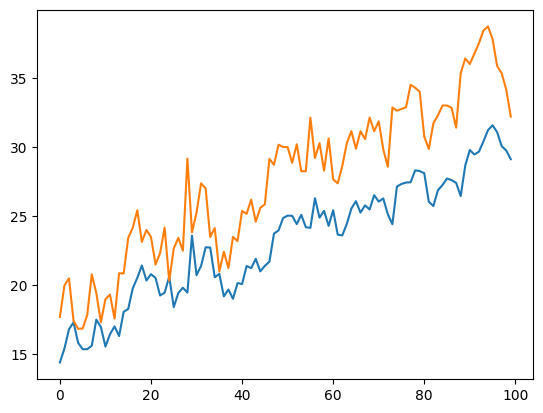

In [89]:
plt.plot(scaled_predictions)
plt.plot(scaled_actual)

In [90]:
test_df = pd.read_csv("DailyDelhiClimateTest.csv",index_col="date",parse_dates=True)

In [91]:
scaler_2 = MinMaxScaler()
time_series_data = scaler_2.fit_transform(test_df.values)

In [92]:
time_series_data.shape

(114, 4)

In [93]:
# Prepare sequences
x_test, y_test = create_multivariate_sequences(time_series_data, seq_length)

In [94]:
x_test.shape

(64, 50, 4)

In [95]:
# Make predictions
predictions = model.predict(x_test[:])
print("Predictions:", predictions.flatten())
print("Actual:", y_test[:])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Predictions: [0.44845897 0.4721595  0.42584026 0.3799172  0.36492366 0.3709336
 0.36885577 0.36078215 0.40092695 0.48231447 0.5065735  0.49018532
 0.42506778 0.38602924 0.3934148  0.4018438  0.4621796  0.4329521
 0.4081697  0.38515204 0.36573    0.33879817 0.34052074 0.355752
 0.39577538 0.4901908  0.42011374 0.5012519  0.49691093 0.4623496
 0.49445772 0.5392953  0.55651486 0.5735278  0.5127612  0.54133457
 0.55293155 0.5805509  0.5967662  0.57279927 0.62180626 0.64301616
 0.61061805 0.63854223 0.6300437  0.596606   0.64692926 0.5785567
 0.5261827  0.5380767  0.53462917 0.5777423  0.60696155 0.640295
 0.68019116 0.6881286  0.6949353  0.7242713  0.7565772  0.7408476
 0.7747475  0.768208   0.73383486 0.73118913]
Actual: [0.52659574 0.46099291 0.34574468 0.32446809 0.34574468 0.34042553
 0.32978723 0.37765957 0.5248227  0.57283142 0.54255319 0.40425532
 0.34574468 0.37234043 0.38297872 0.49468085 0.44874275 0.41641337
 0.38031915 0.32056738 0.2712766 

In [96]:
# Inverse transform the predictions if the target was scaled
scaled_predictions = scaler_2.inverse_transform(np.c_[predictions, np.zeros((len(predictions), 4 - 1))])[:, 0]
scaled_actual = scaler_2.inverse_transform(np.c_[y_test[:], np.zeros((len(y_test[:]), 4 - 1))])[:, 0]

print("Scaled Predictions:", scaled_predictions)
print("Scaled Actual:", scaled_actual)

Scaled Predictions: [21.53878579 22.09574836 21.00724608 19.9280543  19.57570592 19.71693942
 19.6681107  19.47838044 20.42178327 22.33438998 22.90447721 22.51935503
 20.98909289 20.07168722 20.24524769 20.44332898 21.86122063 21.17437449
 20.59198764 20.05107298 19.59465471 18.96175689 19.00223738 19.36017179
 20.30072138 22.51948389 20.87267295 22.77941909 22.67740685 21.86521545
 22.61975646 23.67343992 24.07809919 24.4779036  23.04988763 23.72136238
 23.99389136 24.64294636 25.02400509 24.46078274 25.6124472  26.11087975
 25.34952429 26.00574252 25.80602661 25.02024138 26.20283771 24.59608284
 23.36529371 23.64480242 23.5637854  24.57694355 25.26359639 26.04693317
 26.98449224 27.17102188 27.33098006 28.02037549 28.77956405 28.40991831
 29.20656604 29.05288863 28.24511927 28.1829446 ]
Scaled Actual: [23.375      21.83333333 19.125      18.625      19.125      19.
 18.75       19.875      23.33333333 24.46153846 23.75       20.5
 19.125      19.75       20.         22.625      21.54

In [97]:
type(scaled_predictions)

numpy.ndarray

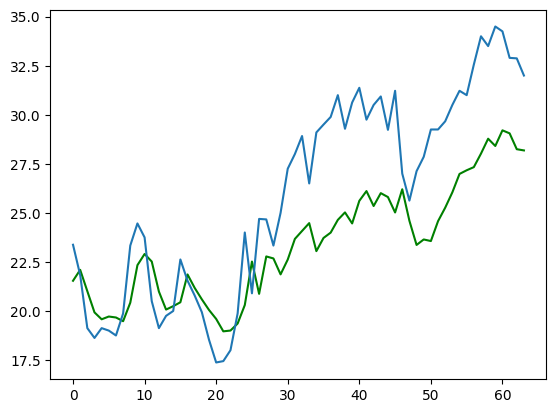

In [98]:
plt.plot(scaled_predictions,c="green")
plt.plot(scaled_actual)

The best metrics for a regression task depend on the specific goals and characteristics of your problem. Below are some commonly used regression metrics and when to use them:

---

### **1. Mean Absolute Error (MAE)**

$
\text{MAE} = \frac{1}{n} \sum_{i=1}^n \lvert y_i - \hat{y}_i \rvert
$

- **What it measures**: The average magnitude of errors in predictions, regardless of direction.
- **When to use**: 
  - When you want a metric that is interpretable in the same units as the target variable.
  - When outliers need to have a **moderate** impact.
- **Pro**: Simple to interpret.
- **Con**: Treats all errors equally (e.g., small and large errors).

---

### **2. Mean Squared Error (MSE)**

$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$

- **What it measures**: The average squared difference between actual and predicted values.
- **When to use**: 
  - When you want to penalize large errors more heavily (because errors are squared).
  - Useful in scenarios where large deviations are undesirable (e.g., financial forecasting).
- **Pro**: Sensitive to large errors.
- **Con**: Can be heavily influenced by outliers, as errors are squared.

---

### **3. Root Mean Squared Error (RMSE)**

$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
$

- **What it measures**: The square root of MSE, bringing the error back to the same units as the target variable.
- **When to use**: 
  - Similar to MSE but easier to interpret because it is in the same unit as the target.
  - Use when you want to penalize large errors and maintain unit interpretability.
- **Pro**: Highlights large errors while remaining interpretable.
- **Con**: Also influenced by outliers.

---

### **4. \( R^2 \) Score (Coefficient of Determination)**

$
R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
$

- **What it measures**: Proportion of variance in the dependent variable explained by the model.
- **When to use**: 
  - When you want to measure how well your model explains the variability in the data.
  - Works best when your model is linear and assumptions are met.
- **Pro**: Intuitive percentage explanation.
- **Con**: Can give misleading values when used for nonlinear models or with high multicollinearity.

---

### **5. Mean Absolute Percentage Error (MAPE)**

$
\text{MAPE} = \frac{1}{n} \sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100
$

- **What it measures**: The average percentage error.
- **When to use**: 
  - When the scale of the target variable varies widely.
  - Useful for business contexts where relative error matters more than absolute.
- **Pro**: Expresses error as a percentage, which is easier to interpret in some contexts.
- **Con**: Cannot handle cases where \( y_i = 0 \); heavily biased toward small targets.

---

### **6. Mean Bias Error (MBE)**

$
\text{MBE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)
$

- **What it measures**: The average bias in predictions.
- **When to use**: 
  - To assess if your model tends to overpredict or underpredict.
- **Pro**: Simple way to detect bias.
- **Con**: Does not reflect the magnitude of errors well.

---

### **7. Explained Variance Score**

$
\text{Explained Variance} = 1 - \frac{\text{Var}(y - \hat{y})}{\text{Var}(y)}
$

- **What it measures**: How much of the variance in the data is captured by the model.
- **When to use**: 
  - Similar to \( R^2 \), but focuses on explaining variance.
  - Useful for datasets with high variance.
- **Pro**: Captures variability effectively.
- **Con**: Can be less intuitive than other metrics.

---

### **Recommendations**
- **If you care about interpretability**: Use **MAE** or **RMSE**.
- **If large errors are critical**: Use **MSE** or **RMSE**.
- **If you want to explain variability**: Use **\( R^2 \)** or **Explained Variance**.
- **If your target variable has varying scales**: Use **MAPE**.
- **If you’re detecting bias**: Use **MBE**.

You can also combine multiple metrics to get a more comprehensive understanding of your model's performance!

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

In [99]:
# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(scaled_actual, scaled_predictions)
print("Mean Absolute Error (MAE):", mae)

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(scaled_actual, scaled_predictions)
print("Mean Squared Error (MSE):", mse)

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# 4. R^2 Score
r2 = r2_score(scaled_actual, scaled_predictions)
print("R^2 Score:", r2)

# 5. Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((scaled_actual - scaled_predictions) / scaled_actual)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape, "%")

# 6. Mean Bias Error (MBE)
mbe = np.mean(scaled_actual - scaled_predictions)
print("Mean Bias Error (MBE):", mbe)

# 7. Explained Variance Score
explained_variance = explained_variance_score(scaled_actual, scaled_predictions)
print("Explained Variance Score:", explained_variance)

Mean Absolute Error (MAE): 3.110823785692699
Mean Squared Error (MSE): 13.554141046267318
Root Mean Squared Error (RMSE): 3.6815949052370387
R^2 Score: 0.4901610332519999
Mean Absolute Percentage Error (MAPE): 11.147677132548536 %
Mean Bias Error (MBE): 2.510223902054559
Explained Variance Score: 0.7271815528144476


In [100]:
# Calculate R^2 score
r2 = r2_score(y_test, predictions)
print("R^2 Score:", r2)

R^2 Score: 0.4901610332520001
